In [16]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix

raiting = pd.read_csv('./ratings_drop.csv' , usecols=[ 'userId' , 'productId' , 'rating'] )
products = pd.read_csv('./products_join_categories.csv')
products = products.loc[:, ~products.columns.str.contains('^Unnamed')]
products.set_index( ['productId'] , inplace=True, drop=True )
products = products.rename({'name': 'product_name'}, axis='columns')
display(products.head())

,product_name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name
productId,,,,,,,,
0,CSSMs Biology: Control in Cells and in Organis...,"832,476,923",832,图书音像,476,其它图书,923.0,进口图书
1,Treasure Island,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿
2,Collins Primary Dictionaries – Collins Junior ...,"832,476,739",832,图书音像,476,其它图书,739.0,工具书
3,Partners in Crime,"832,476,923",832,图书音像,476,其它图书,923.0,进口图书
4,The Hobbit,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿


In [17]:
raiting.sample(10)
display(products.sample(10))

,product_name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name
productId,,,,,,,,
146869,蔡志忠典藏国学漫画系列(套装共6册),"832,519,164",832,图书音像,519,文学艺术,164.0,动漫/幽默
58531,Flower Fairies Alphabet,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿
296177,托马斯和朋友动画故事乐园????第2辑(套装共8册),"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿
27834,名师考案丛书????无机化学考研教案,"832,1101,379",832,图书音像,1101,少儿/教育图书,379.0,教材
315077,ORIENT 东方双狮 传统系列机械男士手表 SER1P006G0,"486,487,387",486,钟表/首饰/眼镜/礼品,487,钟表,387.0,闹钟
494067,金星教育????现用现查:小学语文教材课内外知识现用现查(2013),"832,1101,374",832,图书音像,1101,少儿/教育图书,374.0,中小学教辅
290882,劳动案件立案标准,"832,723,160",832,图书音像,723,人文社科类图书,160.0,法律
96604,车辆路径问题(影印版),"832,723,221",832,图书音像,723,人文社科类图书,221.0,政治/军事
328190,学生必读名著书架????白海豹,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿


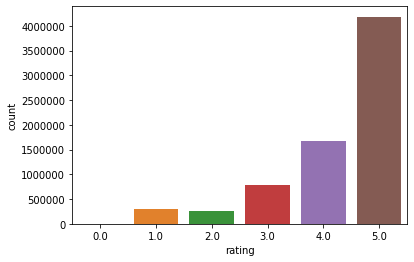

In [18]:
sns.countplot(data=raiting , x = 'rating' )
plt.show()

In [19]:
userRaitingCount = raiting['userId'].value_counts();
raitingFiltered = raiting[raiting['userId'].isin(userRaitingCount[userRaitingCount >= 50 ].index)]
print(raitingFiltered.shape)
print(raiting.shape)
productRaitingCount = raiting['productId'].value_counts();
raitingFiltered = raitingFiltered[raitingFiltered['userId'].isin(productRaitingCount[productRaitingCount >= 100 ].index)]
print(raitingFiltered.shape)

(1847803, 3)
(7202921, 3)
(35024, 3)


In [20]:
raitingFiltered.drop_duplicates(subset=['userId', 'productId'], keep='first' , inplace =True )
raitingFilteredPivot = raitingFiltered.pivot( index='productId' , columns='userId' , values="rating" ).fillna(0)

In [21]:
joinEdRaiting = pd.merge(products, raitingFiltered, on='productId', how='inner')

In [22]:
display(display(joinEdRaiting.sample(10)))

,productId,product_name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name,userId,rating
18609,292221,亨王 USB超静音迷你小风扇(金属外罩、金属叶片、金属支架)蓝色,"1057,439,645",1057,电脑/办公,439,外设产品,645.0,USB电脑周边,10980.0,5.0
3556,52833,塔缪缪 男士纯棉双丁字内裤 T裤 性感内裤D0803,"802,1100,1034",802,服饰服装,1100,内衣/家居服,1034.0,内裤,50316.0,4.0
33162,508824,美赞臣安儿健A+奶粉4段1200g,"911,39,256",911,母婴/玩具,39,奶粉,256.0,婴儿牛奶粉,10368.0,5.0
29181,450131,SanDisk 闪迪 microSDHC Class10 16GB至尊高速移动存储卡 UHS...,"1057,268,902",1057,电脑/办公,268,存储设备,902.0,存储卡,693.0,5.0
26696,412699,八极拳(配DVD-ROM光盘1张),"832,665,253",832,图书音像,665,生活类图书,253.0,体育/运动,74139.0,5.0
26001,402583,2012年考研思想政治理论基础复习,"832,723,221",832,图书音像,723,人文社科类图书,221.0,政治/军事,85591.0,4.0
29835,460968,文都教育????2013考研英语阅读思路解析(附50元网校增值卡1张),"832,1101,921",832,图书音像,1101,少儿/教育图书,921.0,外语,4874.0,4.0
20011,315185,统计学,"832,723,189",832,图书音像,723,人文社科类图书,189.0,社会科学,88655.0,3.0
14542,227270,经典世界童话故事日语诵读(附赠MP3光盘1张),"832,1101,921",832,图书音像,1101,少儿/教育图书,921.0,外语,22785.0,3.0
4966,76018,佐贺的超级阿嬷,"832,519,1",832,图书音像,519,文学艺术,1.0,小说,64771.0,5.0


None

In [51]:
dis = joinEdRaiting.groupby(['cat1_name']).count().sort_values(by='rating' , ascending=False )
dis

,productId,product_name,catIds,cat1,cat2,cat2_name,cat3,cat3_name,userId,rating
cat1_name,,,,,,,,,,
图书音像,21500,21500,21500,21500,21500,21500,21500,21500,21500,21500
电脑/办公,4087,4087,4087,4087,4087,4087,4065,4065,4087,4087
手机/数码,1514,1514,1514,1514,1514,1514,1514,1514,1514,1514
美妆个护,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459
家用电器,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045
家居生活,899,899,899,899,899,899,899,899,899,899
母婴/玩具,597,597,597,597,597,597,595,595,597,597
服饰服装,595,595,595,595,595,595,595,595,595,595
鞋类箱包,574,574,574,574,574,574,572,572,574,574


In [15]:
#user based:
raitingFilteredMatrix = csr_matrix(raitingFilteredPivot.values)
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(raitingFilteredMatrix)
NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine', metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

#489000->productId
queryIndex = raitingFilteredPivot.index.get_loc(231449)
# queryIndex = np.random.choice(raitingFilteredPivot.shape[0])
distances, indices = model_knn.kneighbors(raitingFilteredPivot.iloc[queryIndex, :].values.reshape(1, -1), n_neighbors=6)

print('Recommendations for {0} ( {1} | {2} | {3} :\n'.format( products.iloc[raitingFilteredPivot.index[queryIndex]].product_name ,
                                                                     products.iloc[raitingFilteredPivot.index[queryIndex]].cat1_name,
                                                                     products.iloc[raitingFilteredPivot.index[queryIndex]].cat2_name,
                                                                     products.iloc[raitingFilteredPivot.index[queryIndex]].cat3_name))

for i in range(0, len(distances.flatten())):
        print('{0}: {1} ( {2} | {3} | {4} ) , with distance of {5}:'.format(i,
                                                                           products.iloc[raitingFilteredPivot.index[indices.flatten()[i]]].product_name ,
                                                                           products.iloc[raitingFilteredPivot.index[indices.flatten()[i]]].cat1_name,
                                                                           products.iloc[raitingFilteredPivot.index[indices.flatten()[i]]].cat2_name,
                                                                           products.iloc[raitingFilteredPivot.index[indices.flatten()[i]]].cat3_name,
                                                                           distances.flatten()[i]))

Recommendations for 致我们终将逝去的青春(附"致青春"珍藏卡册) ( 图书音像 | 文学艺术 | 青春文学 :

0: 致我们终将逝去的青春(附"致青春"珍藏卡册) ( 图书音像 | 文学艺术 | 青春文学 ) , with distance of 0.0:
1: 致我们终将逝去的青春(典藏版) ( 图书音像 | 文学艺术 | 青春文学 ) , with distance of 0.3859923880002929:
2: 星火英语:真题详解+标准预测6级(附CD-ROM+词汇卡片) ( 图书音像 | 少儿/教育图书 | 考试 ) , with distance of 0.5521889244801009:
3: Edifier漫步者 R1200T 2.0声道音箱(木色 丝膜球顶高音,4英寸低音扬声器) ( 电脑/办公 | 外设产品 | 电脑音箱 ) , with distance of 0.554815405055026:
4: 致我们终将逝去的青春 ( 图书音像 | 文学艺术 | 青春文学 ) , with distance of 0.5799159747915971:
5: 别笑!我是英文单词书(全彩图文本)(随书附赠390分钟1、2、3.4英汉双语朗读光盘!) ( 图书音像 | 少儿/教育图书 | 外语 ) , with distance of 0.6059787862023847:
